In [307]:
import pandas as pd 
import random
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

In [308]:
data = pd.read_csv("/Users/kejunchen/Downloads/diabetes.csv") 
epsilon = 0.00001
y = data.Outcome
x = data.drop('Outcome', axis=1)
y = y.to_numpy()
x = x.to_numpy()

In [309]:
print(x.shape[0])
print(x.shape[1])

768
8


In [310]:
#scale data problem 2b
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [311]:
#problem 3c try different method
#scaler = StandardScaler()
#x = scaler.fit_transform(x)
#k = 8
#pca = PCA(n_components = k)
#x = pca.fit_transform(x)
x = preprocessing.normalize(x)

In [312]:
x = np.c_[np.ones(x.shape[0]), x] 
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size = 0.2, stratify  = y ,random_state = 0)

In [313]:
print(x_test[1])

[1.         0.00800116 0.73610642 0.49607172 0.20002892 0.32804743
 0.15602256 0.00385656 0.20002892]


In [314]:
def sigmoid(z):
        return 1./ (1 + np.exp(-z))

In [315]:
def lossfunc(x, y, w):
    y_pred = sigmoid(np.dot(x, w))
    return -(y*np.log(y_pred) + (1- y)* np.log(1 - y_pred))

In [316]:
old = x_train.shape[0]
theta = np.random.random((9,1))
eta = 0.001
interval = 0
avg_loss = []
avg_acc = []
for i in range (10000):
    start = time.time()
    loss = 0.
    correct = 0
    overall = 0 
    avg = 0
    for n in range(x_train.shape[0]):
        h = sigmoid(np.dot(x_train[n],theta))
        theta = theta - eta * (h - y_train[n]) * (x_train[n].reshape(9,1))   
    for m in range (x_train.shape[0]):
        overall = overall + lossfunc(x_train[m], y_train[m], theta)  
        h = sigmoid(np.dot(x_train[m],theta))
        correct += 1 if np.abs(h - y_train[m]) < 0.5 else 0
    
    avg_acc.append(float(correct) / float(x_train.shape[0]))
    avg_loss.append(overall / float(x_train.shape[0]))
    avg = overall / float(x_train.shape[0])
    diff = abs(old - avg)
    old = avg
    if diff < epsilon:
        break
    interval = interval + time.time() - start
print(theta)
print(interval / i)

[[-0.03546145]
 [ 0.7471336 ]
 [ 0.64598564]
 [-2.49292033]
 [-0.54588267]
 [ 0.0256517 ]
 [-0.20091524]
 [ 0.24859705]
 [ 0.1227684 ]]
0.015773999528345774


In [317]:
print(i)

513


In [318]:
print(overall)

[379.36459252]
[0.3485342019543974, 0.3485342019543974, 0.3534201954397394, 0.4820846905537459, 0.6530944625407166, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.6514657980456026, 0.65

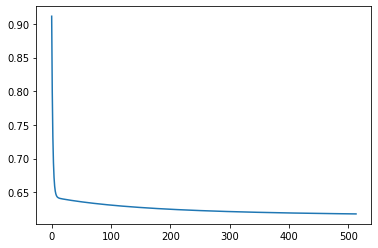

In [319]:
import matplotlib.pyplot as plt

plt.plot(avg_loss)

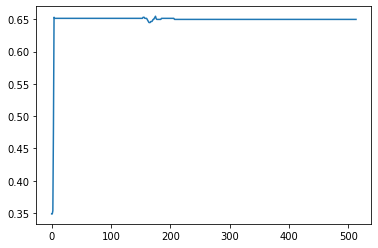

In [320]:
plt.plot(avg_acc)

In [321]:
overall = 0
correct = 0
avg_acc = 0
avg_loss = 0
for m in range (x_test.shape[0]):
    overall = overall + lossfunc(x_test[m], y_test[m], theta)  
    h = sigmoid(np.dot(x_test[m],theta))
    correct += 1 if np.abs(h - y_test[m]) < 0.5 else 0
avg_acc = float(correct) / float(x_test.shape[0])
avg_loss = overall / float(x_test.shape[0])

In [322]:
print(avg_acc)
print(avg_loss)
print(overall)

0.6363636363636364
[0.61788588]
[95.15442532]
